In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
height=128
width =128

In [3]:
Train_Img_Folder = '/home/mononoke/ChessDetection/IIIT-A/FaceRecongnition/images1/Training images'

Train Images:


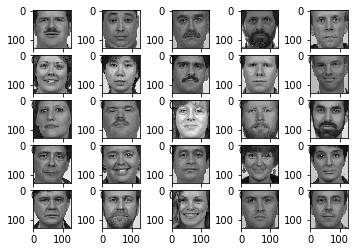

In [30]:
print("Train Images:")
train_images_names = os.listdir(Train_Img_Folder) # is a list
training_tensor = np.ndarray(shape=(len(train_images_names),height*width),dtype=np.float64) # shape(rows,columns)

for i in range(len(train_images_names)):
    img = plt.imread(Train_Img_Folder+'/'+train_images_names[i])
    training_tensor[i:] = np.array(img,dtype='float64').flatten()
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
plt.show()

In [35]:
print(training_tensor.shape)
training_tensor[0].shape

(25, 16384)


(16384,)

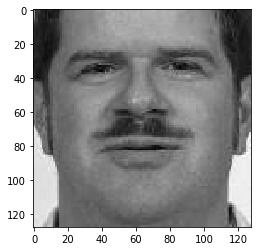

In [5]:
plt.imshow(training_tensor[0].reshape(height,width),"gray")

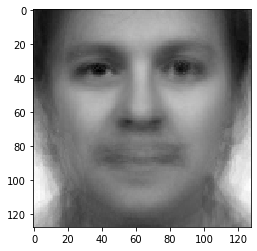

In [6]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_images_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.show()

In [7]:
normalised_training_tensor = np.ndarray(shape=(len(train_images_names), height*width))
for i in range(len(train_images_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

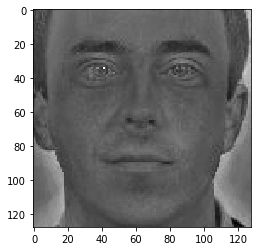

In [8]:
for i in range(len(normalised_training_tensor)):
    img = normalised_training_tensor[i].reshape(height,width)
    # plt.subplot(5,5,1+i)
    plt.imshow(img,cmap="gray")

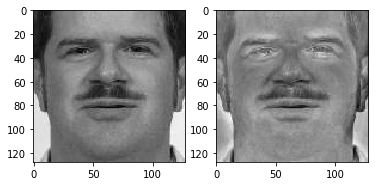

In [9]:
plt.subplot(1,2,1)
plt.imshow(training_tensor[0].reshape(height,width),"gray")
plt.subplot(1,2,2)
plt.imshow(normalised_training_tensor[0].reshape(height,width),"gray")

In [10]:
# print(training_tensor.shape)
conv_matrix = np.cov(training_tensor)

eigenvalue,eigenvector = np.linalg.eig(conv_matrix)

In [11]:
eigenvalue

array([20436.41753107,  5577.23388208,  3571.5789008 ,  2213.81615685,
        1560.87362303,  1290.81266541,  1108.91210732,  1078.85452974,
         992.80674778,   839.4802218 ,   729.85823647,   642.97782897,
         197.46842331,   210.43069839,   239.04768598,   293.53095053,
         310.88187338,   333.41917813,   366.99635259,   576.26231302,
         555.62883677,   515.02422393,   427.13679705,   449.69735831,
         468.88508199])

In [12]:
#Plotting the eigen vectors for each face..
'''
A -> (160000,25)
A.t A  * (vector) = constant * vector 
A.t A -> 25 , 25 or better as the number of images..
Eigen vector would be of 25*25 
'''
print("ok")


ok


Eigen Vector gives the directions in which it is stretched and the magnitude is the eigen value.
Eigen Face is the name given to a set of eigenvectors used in human face recongiton system. (% us of each eigen vector..)


In [13]:
eig_pairs = [(eigenvalue[index],eigenvector[:,index]) for index in range(len(eigenvalue))]
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalue))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalue))]

sorted_ind = sorted(range(eigenvalue.shape[0]), key=lambda k: eigenvalue[k], reverse=True)

eigvalues_sort = eigenvalue[sorted_ind]
eigvectors_sort = eigenvector[sorted_ind]
train_set_files_sort = np.array(os.listdir("images1/Training images/"))[sorted_ind]

In [14]:
reduced_data = np.array(eigvectors_sort[:25]).transpose()
print(training_tensor.shape)
print("the reduced data shape is :",reduced_data.shape)
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(25, 16384)
the reduced data shape is : (25, 25)


(25, 16384)

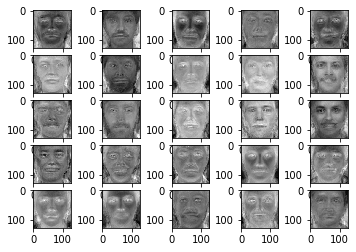

In [15]:
# plotting the eigen faces..
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(5,5,1+i)
    plt.imshow(img, cmap='gray')
plt.show()

In [16]:
# 25 directions mein mila ke ek eigen vector aaya and aise 25 hai ..

In [17]:
alpha = sorted(eigvectors_sort[0].tolist(),reverse=True)

In [18]:
# multiple eigen vector by the wigen value to get the linear transformation

In [19]:
# reduce the dimensions and select only 2 dimensions
k = 2
reduced_data = np.array(eigvectors_sort[:2]).transpose()
reduced_values = np.array(eigvalues_sort[:2])
reduced_data.shape


(25, 2)

In [20]:
reduced_values

array([20436.41753107,  5577.23388208])

In [21]:
print(training_tensor.transpose().shape, reduced_data.shape)

(16384, 25) (25, 2)


Now what to do ?
Hence now we have to plot the eigen faces and the 

In [22]:
# plot the eigen vectors for all the faces
origin = [0,0]

In [23]:
reduced_data[0]

array([-0.21852423, -0.17061631])

In [24]:
reduced_values

array([20436.41753107,  5577.23388208])

In [25]:
a = reduced_data[0][0] * reduced_values[0]
b = reduced_data[0][1] * reduced_values[1]

In [26]:
reduced_data[0][1] * reduced_values[1]

-951.567072593377

In [27]:
reduced_data[0][0] * reduced_values[0]

-4465.8524944559085

(-420, 420)

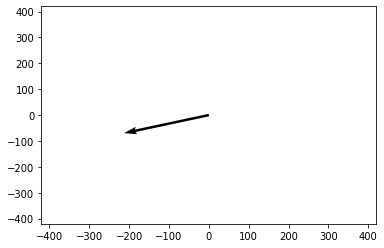

In [36]:
plt.quiver(*origin,a,b,scale=21,scale_units="x")
plt.xlim(-420,420)
plt.ylim(-420,420)

In [37]:
# key features detect 

#3 mein divide -> 
#cropped image par karna hai ...
# 1/6 image 
# full region ka ek feature uska pca karo ...
# exact face detect karne ka hai...

## Report : Incomplete